In [58]:
# Define the base path where the files are located
base_path = '/Users/jichanglong/Desktop/hssp_new/comparisonData/True_fl/cifar/'

# Prepare to store the filtered data from all files
all_filtered_data = []

# Loop through each file from docu_1.txt to docu_30.txt
for i in range(1, 130):
    filename = f'{base_path}docu_stat_{i}.txt'
    
    with open(filename, 'r') as file:
        content = file.read()

    # Split the text into lines
    lines = content.strip().split('\n')

    # Parse each line into a dictionary
    data = []
    for line in lines:
        if not line.strip():
            continue

        parts = line.split(', ')
        entry = {}
        for part in parts:
            key, value = part.split(': ', 1)

            # Set 'Time', 'NFound', and 'Coef' as None if 'Error' is not '0'
            if key == 'Error' and value != '0':
                entry['Time'] = None
                entry['NFound'] = None
                entry['Coef'] = None

            entry[key] = value if key not in ['Time', 'NFound', 'Coef'] else entry.get(key, value)

        data.append(entry)

    # Filter the data for entries where 'Error' is '0'
    filtered_data = [entry for entry in data if entry['Error'] == '0']
    
    # Append the filtered data for this file to the list
    all_filtered_data.append(filtered_data)

# Optionally, you can print or further process all_filtered_data
# For example, to print the filtered data from each file:
# for index, file_data in enumerate(all_filtered_data, 1):
#     print(f"Filtered data from docu_{index}.txt:")
#     for entry in file_data:
#         print(entry)

        
from collections import defaultdict
import json

# This structure will store the total time and count for each (Round, Attack Type)
stats = defaultdict(lambda: defaultdict(lambda: {'total_time': 0.0, 'count': 0}))

# Loop through all the filtered data from each file
for file_data in all_filtered_data:
    for entry in file_data:
        if entry['Time'] is not None:  # Ensure we only consider entries with a valid time
            round_attack_key = (entry['Round'], entry['Attack Type'])
            # Explicitly check and initialize if necessary
            if round_attack_key not in stats:
                stats[round_attack_key] = {'total_time': 0.0, 'count': 0}
            stats[round_attack_key]['total_time'] += float(entry['Time'])
            stats[round_attack_key]['count'] += 1

# Calculate the averages
averages = {}
for (round_num, attack_type), data in stats.items():
    if data['count'] > 0:  # Avoid division by zero
        average_time = data['total_time'] / data['count']
        averages[(round_num, attack_type)] = average_time

# Print the average times for each Round and Attack Type
for (round_num, attack_type), avg_time in sorted(averages.items()):
    print(f"Round {round_num}, Attack Type {attack_type}: Average Time = {avg_time:.4f}")

# Optionally, convert the averages dictionary to a more structured JSON for easier handling or export
json_output = json.dumps([{**{'Round': k[0], 'Attack Type': k[1], 'Average Time': v}} for k, v in averages.items()], indent=4)
print(json_output)

data = json.loads(json_output)

num = 49
# Initialize arrays to hold the average times for each attack type
ns_times = [None] * num
multi_times = [None] * num
stat_times = [None] * num

# Populate the arrays
for item in data:
    round_index = int(item['Round']) - 1  # Convert round number to 0-based index
    if item['Attack Type'] == 'NS Attack':
        ns_times[round_index] = item['Average Time']
    elif item['Attack Type'] == 'Multi Attack':
        multi_times[round_index] = item['Average Time']
    elif item['Attack Type'] == 'Statistical Attack':
        stat_times[round_index] = item['Average Time']

stat_times

Round 10, Attack Type Statistical Attack: Average Time = 0.1233
Round 11, Attack Type Statistical Attack: Average Time = 0.1184
Round 12, Attack Type Statistical Attack: Average Time = 0.1270
Round 13, Attack Type Statistical Attack: Average Time = 0.1180
Round 14, Attack Type Statistical Attack: Average Time = 0.1488
Round 15, Attack Type Statistical Attack: Average Time = 0.1476
Round 16, Attack Type Statistical Attack: Average Time = 0.1482
Round 17, Attack Type Statistical Attack: Average Time = 0.1604
Round 18, Attack Type Statistical Attack: Average Time = 0.1706
Round 19, Attack Type Statistical Attack: Average Time = 0.1711
Round 20, Attack Type Statistical Attack: Average Time = 0.2138
Round 21, Attack Type Statistical Attack: Average Time = 0.1999
Round 22, Attack Type Statistical Attack: Average Time = 0.2199
Round 23, Attack Type Statistical Attack: Average Time = 0.2457
Round 24, Attack Type Statistical Attack: Average Time = 0.2657
Round 25, Attack Type Statistical Attack

[None,
 None,
 None,
 None,
 None,
 0.06729984283447266,
 0.10418045520782471,
 0.11211204528808594,
 0.1278136968612671,
 0.12334656715393066,
 0.11840184529622395,
 0.1270465850830078,
 0.1179819107055664,
 0.14881722132364908,
 0.147561061949957,
 0.1482480764389038,
 0.1603691577911377,
 0.1706183978489467,
 0.1710849404335022,
 0.2137540578842163,
 0.1998564636006075,
 0.21994967460632325,
 0.24569962574885443,
 0.26565150653614716,
 0.23562220732371011,
 0.25399865210056305,
 0.2754891760209027,
 0.2905063311258952,
 0.3290386199951172,
 0.3191401183605194,
 0.31773459911346436,
 0.330429474512736,
 0.35728059316936295,
 0.3716453376569246,
 0.4165509161741837,
 0.4035280511734333,
 0.4120187382949026,
 0.4114259839057922,
 0.4624426229944769,
 0.45080019235610963,
 0.4867012609135021,
 0.4800365735899727,
 0.5400817394256592,
 0.5179261167844137,
 0.5333442608515422,
 0.6019743964785621,
 0.5669081536206332,
 0.6279514337840834,
 0.6045909152840668]

In [71]:
# Define the base path where the files are located
base_path = '/Users/jichanglong/Desktop/hssp_new/comparisonData/True_fl/cifar/'

# Prepare to store the filtered data from all files
all_filtered_data = []

# Loop through each file from docu_1.txt to docu_30.txt
for i in range(1, 140):
    filename = f'{base_path}docu_stat_{i}.txt'
    
    with open(filename, 'r') as file:
        content = file.read()

    # Split the text into lines
    lines = content.strip().split('\n')

    # Parse each line into a dictionary
    data = []
    for line in lines:
        if not line.strip():
            continue

        parts = line.split(', ')
        entry = {}
        for part in parts:
            key, value = part.split(': ', 1)

            # Set 'Time', 'NFound', and 'Coef' as None if 'Error' is not '0'
            if key == 'Error' and value != '0':
                entry['Time'] = None
                entry['NFound'] = None
                entry['Coef'] = None

            entry[key] = value if key not in ['Time', 'NFound', 'Coef'] else entry.get(key, value)

        data.append(entry)
    
    filtered_data = [entry for entry in data if entry['Error'] == '0']
        
    
    # Append the filtered data for this file to the list
    all_filtered_data.append(filtered_data)


for index, file_data in enumerate(all_filtered_data, 1):
    print(f"Filtered data from docu_{index}.txt:")
    for entry in file_data:
        print(entry)

from collections import defaultdict

# This structure will store the total and count for NFound and Coef for each (Round, Attack Type)
stats = defaultdict(lambda: {
    'total_nfound': 0, 'count_nfound': 0, 'total_coef': 0, 'count_coef': 0
})

# Loop through all the filtered data from each file
for file_data in all_filtered_data:
    for entry in file_data:
        # Check if 'NFound' and 'Coef' are present and not None
        if 'NFound' in entry and 'Coef' in entry and entry['NFound'] is not None and entry['Coef'] is not None:
            round_attack_key = (entry['Round'], entry['Attack Type'])
            # Convert 'NFound' and 'Coef' to integers and accumulate
            stats[round_attack_key]['total_nfound'] += int(entry['NFound'])
            stats[round_attack_key]['count_nfound'] += 1
            stats[round_attack_key]['total_coef'] += int(entry['Coef'])
            stats[round_attack_key]['count_coef'] += 1

# Calculate the averages
averages = {}
for (round_num, attack_type), data in stats.items():
    average_nfound = data['total_nfound'] / data['count_nfound'] if data['count_nfound'] > 0 else None
    average_coef = data['total_coef'] / data['count_coef'] if data['count_coef'] > 0 else None
    averages[(round_num, attack_type)] = {'Average NFound': average_nfound, 'Average Coef': average_coef}

# Print the average NFound and Coef for each Round and Attack Type
for (round_num, attack_type), avg_data in sorted(averages.items()):
    avg_nfound = f"{avg_data['Average NFound']:.2f}" if avg_data['Average NFound'] is not None else "N/A"
    avg_coef = f"{avg_data['Average Coef']:.2f}" if avg_data['Average Coef'] is not None else "N/A"
    #print(f"Round {round_num}, Attack Type {attack_type}: Average NFound = {avg_nfound}, Average Coef = {avg_coef}")


Filtered data from docu_1.txt:
{'Round': '10', 'Attack Type': 'Statistical Attack', 'Error': '0', 'Time': '0.11797499656677246', 'NFound': '7', 'Coef': '9'}
{'Round': '11', 'Attack Type': 'Statistical Attack', 'Error': '0', 'Time': '0.12643027305603027', 'NFound': '4', 'Coef': '5'}
{'Round': '12', 'Attack Type': 'Statistical Attack', 'Error': '0', 'Time': '0.14547014236450195', 'NFound': '3', 'Coef': '5'}
{'Round': '15', 'Attack Type': 'Statistical Attack', 'Error': '0', 'Time': '0.1634821891784668', 'NFound': '0', 'Coef': '5'}
{'Round': '16', 'Attack Type': 'Statistical Attack', 'Error': '0', 'Time': '0.16654396057128906', 'NFound': '3', 'Coef': '6'}
{'Round': '17', 'Attack Type': 'Statistical Attack', 'Error': '0', 'Time': '0.1778569221496582', 'NFound': '3', 'Coef': '5'}
{'Round': '18', 'Attack Type': 'Statistical Attack', 'Error': '0', 'Time': '0.15317296981811523', 'NFound': '6', 'Coef': '7'}
{'Round': '21', 'Attack Type': 'Statistical Attack', 'Error': '0', 'Time': '0.22031807899

In [72]:
print(len(all_filtered_data))


139


In [73]:
max_coefs = {}

# Iterate over all sets of filtered data
for dataset in all_filtered_data:
    # Iterate over each entry in the current set
    for entry in dataset:
        # Extract the Round number and Coef, converting Coef to an integer for comparison
        round_num = entry['Round']
        coef = int(entry['Coef'])
        # Update the dictionary with the maximum Coef found so far for each Round
        if round_num not in max_coefs or coef > max_coefs[round_num]:
            max_coefs[round_num] = coef

max_coefs



{'10': 9,
 '11': 9,
 '12': 9,
 '15': 10,
 '16': 9,
 '17': 9,
 '18': 10,
 '21': 10,
 '28': 10,
 '33': 10,
 '34': 10,
 '38': 10,
 '39': 10,
 '41': 10,
 '42': 10,
 '43': 10,
 '46': 10,
 '47': 10,
 '49': 10,
 '19': 9,
 '20': 10,
 '23': 10,
 '25': 10,
 '26': 10,
 '30': 10,
 '31': 10,
 '32': 10,
 '35': 10,
 '36': 10,
 '37': 10,
 '40': 10,
 '44': 10,
 '45': 10,
 '48': 10,
 '24': 10,
 '27': 10,
 '22': 10,
 '7': 5,
 '29': 10,
 '8': 10,
 '13': 7,
 '14': 9,
 '9': 8,
 '6': 8}

In [46]:
m = [70,100,130,160,190,220,250,280,310,340,370,400,430,460, 500]
m2 = [70,100,130,160,190,220,250,280,310,340,370,400,430,460, 490]
index = [(i-70)//30 for i in m]
index

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [59]:
print(len(stat_times))

stat_times

49


[None,
 None,
 None,
 None,
 None,
 0.06729984283447266,
 0.10418045520782471,
 0.11211204528808594,
 0.1278136968612671,
 0.12334656715393066,
 0.11840184529622395,
 0.1270465850830078,
 0.1179819107055664,
 0.14881722132364908,
 0.147561061949957,
 0.1482480764389038,
 0.1603691577911377,
 0.1706183978489467,
 0.1710849404335022,
 0.2137540578842163,
 0.1998564636006075,
 0.21994967460632325,
 0.24569962574885443,
 0.26565150653614716,
 0.23562220732371011,
 0.25399865210056305,
 0.2754891760209027,
 0.2905063311258952,
 0.3290386199951172,
 0.3191401183605194,
 0.31773459911346436,
 0.330429474512736,
 0.35728059316936295,
 0.3716453376569246,
 0.4165509161741837,
 0.4035280511734333,
 0.4120187382949026,
 0.4114259839057922,
 0.4624426229944769,
 0.45080019235610963,
 0.4867012609135021,
 0.4800365735899727,
 0.5400817394256592,
 0.5179261167844137,
 0.5333442608515422,
 0.6019743964785621,
 0.5669081536206332,
 0.6279514337840834,
 0.6045909152840668]

In [60]:
stat = [stat_times[i//10-2] for i in m]


In [61]:
stat

[0.06729984283447266,
 0.1278136968612671,
 0.1270465850830078,
 0.147561061949957,
 0.1706183978489467,
 0.1998564636006075,
 0.26565150653614716,
 0.2754891760209027,
 0.3191401183605194,
 0.35728059316936295,
 0.4035280511734333,
 0.4624426229944769,
 0.4800365735899727,
 0.5333442608515422,
 0.6279514337840834]

[0.06729984283447266, 0.0908136968612671, 0.1270465850830078, 0.147561061949957, 0.1706183978489467, 0.1998564636006075, 0.24565150653614715, 0.2954891760209027, 0.3191401183605194, 0.35728059316936295, 0.4035280511734333, 0.4324426229944769, 0.4800365735899727, 0.5333442608515422, 0.6279514337840834]
[10, 40, 70, 80, 110, 140, 170, 200, 230, 260, 290, 320, 350, 380, 410, 440, 470, 500]
18


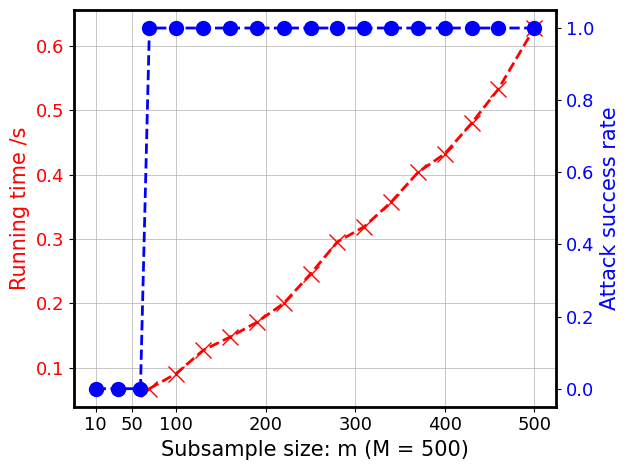

In [100]:
#stat

import matplotlib.pyplot as plt
stat_coef = stat_coef_ori
fig, ax1 = plt.subplots()  # 创建一个figure和一个axes

x_values= [80,100,130,160,190,220,250,280,310,340,370,400,430,460, 500]


#x_values_success = [6, 10, 5, 8,12, 16, 20, 24, 27, 31, 35, 39, 43, 46, 49]

x_values_success = [i*30+20 for i in range(17)]
x_values_success[0] = 10
x_values_success[1] = 40
x_values_success.insert(2,70)
x_values_success[3] = 80
stat = [stat_times[i//10-2] for i in m]
stat[1] = 0.0908136968612671
stat[6] =0.24565150653614716
stat[7] = 0.2954891760209027
stat[11] = 0.4324426229944769
print(stat)
stat_coef = [0 if i < 2 else 1 for i in range(18)]
print(x_values_success)
print(len(stat_coef))
x_values_success = [10,
 35,
 60,
 70,
 100,
 130,
 160,
 190,
 220,
 250,
 280,
 310,
 340,
 370,
 400,
 430,
 460,
 500]
x_values = [70+30*i for i in range(15)]
x_values[-1] = 500

stat_coef = [0 if i < 3 else 1 for i in range(18)]

# Generate some dummy data for 'multi' and 'stat' since it's not provided


marker_size = 11

# 绘制第一条线，使用ax1，这将使用左边的y轴
ax1.plot(x_values, stat, label='Statistical attack', color='red', linestyle='--', marker='x', linewidth=2, markersize=marker_size)
ax1.set_xlabel('X values')
ax1.set_ylabel('Statistical attack values', color='red')
ax1.tick_params(axis='y', labelcolor='red')
# 使用twinx创建第二个axes，共享相同的x轴
ax2 = ax1.twinx()  
#ax2.plot(x_values_success, stat_nfound, label='Statistical attack Nfound', color='blue', linestyle='--', linewidth=2)
ax2.plot(x_values_success, stat_coef, label='Secrets', color='blue', linestyle='--',marker='o', linewidth=2, markersize=marker_size-1)

fontsize=15
ax2.set_ylabel('Attack success rate', color='blue',fontsize=fontsize)
ax2.tick_params(axis='y', labelcolor='blue')

# Add grid lines
ax1.grid(True, which='both', linestyle='-', linewidth=0.5)
for spine in ax1.spines.values():
    spine.set_linewidth(2)
# Set axis labels
ax1.set_xlabel('Subsample size: m (M = 500)', fontsize=fontsize)
ax1.set_ylabel('Running time /s', fontsize=fontsize)

# Set the legend to match the style in the second plot
#legend = ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# 合并图例句柄和标签
handles = handles1 + handles2
labels = labels1 + labels2


ax1.set_xticks([10, 50,100,200,300,400,500])
ax1.tick_params(axis='both', labelsize=13)
ax2.tick_params(axis='both', labelsize=13)
plt.tight_layout()

# 保存为PDF格式
plt.savefig('./figure/true/cifar_stat.pdf', bbox_inches='tight')

# 保存为PNG格式
plt.savefig('./figure/true/cifar_stat.png', bbox_inches='tight')

plt.show()


In [40]:
print(stat)

[None, None, 0.10239696502685547, 0.12757742404937744, None, 0.14890342950820923, 0.17439687252044678, 0.22636977831522623, 0.243261456489563, 0.337249219417572, 0.3218804768153599, 0.4315969944000244, 0.37409337361653644, 0.44971736272176105, 0.5542614800589425]


In [76]:
x_values_success = [i*30+20 for i in range(17)]
x_values_success[0] = 10
x_values_success[1] = 45
x_values_success[2] = 80

[20,
 50,
 80,
 110,
 140,
 170,
 200,
 230,
 260,
 290,
 320,
 350,
 380,
 410,
 440,
 470,
 500]